<a href="https://colab.research.google.com/github/sharon15-netizen/Group4/blob/master/FINAL_Combined_Moringa_group4_project_Wk5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moringa Data Science Prep Group Project: Week 5

# Importing our Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Reading Our Dataset From CSV

In [0]:
# load the dataset into csv
df = pd.read_csv('Life_Expectancy_Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Previewing our Dataset

In [0]:
# preview the first 5 rows of the dataset
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Accessing Information About Our Dataset

In [0]:
# accessing the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [0]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [0]:
#confirm if there are any null values
df.isnull().values.any()

True

In [0]:
#Identifying the cloumns with nulls values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [0]:
#Calculating the total number of cells with nulls values
df.isnull().sum().sum()

2563

# Cleaning the Dataset

## Uniformity

In [0]:
# Procedure 1 
# Data cleaning actions :  Standardizing the columns by lowering the column names and removig the white spaces in the dataset columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(', '').str.replace(')','')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

## Validity

In [0]:
# Procedure 1 
# Data cleaning actions : Dropping irrelevant attributes 

df.drop(['percentage_expenditure','hepatitis_b','under-five_deaths','total_expenditure','diphtheria','gdp','population','polio','thinness__1-19_years',
         'thinness_5-9_years','income_composition_of_resources','schooling'], axis=1, inplace=True)
df.head()


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,bmi,hiv/aids
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,1154,19.1,0.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,492,18.6,0.1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,430,18.1,0.1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,2787,17.6,0.1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,3013,17.2,0.1


In [0]:
#finding the number of null values after dropping unnecessary columns
df.isnull().sum()

country              0
year                 0
status               0
life_expectancy     10
adult_mortality     10
infant_deaths        0
alcohol            194
measles              0
bmi                 34
hiv/aids             0
dtype: int64

## Completeness

In [0]:
# checking for missing values
df.isnull().sum().sum()

248

In [0]:
# Procedure 1
# Data cleaning action: fillfoward all the empty cells
df1=df.fillna(0, inplace = True)
df1=df.fillna(method='ffill')
df1


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,bmi,hiv/aids
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,1154,19.1,0.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,492,18.6,0.1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,430,18.1,0.1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,2787,17.6,0.1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,3013,17.2,0.1
...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,31,27.1,33.6
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,998,26.7,36.7
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,304,26.3,39.8
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,529,25.9,42.1


In [0]:
# checking the size of the dataset
df1.shape

(2938, 10)

In [0]:
# Procedure 2 # tried to drop the rows entirely when I used country as column index
# Data cleaning action: Deleting rows that would skew our data
# Explanation: This dataset records attributes of each country in a span of 15 years. We delete countries that do not meet this condition
# 

df1a=df1.drop(df1.index[[624, 769, 1650, 1715, 1812, 1909, 1958, 2167, 2216, 2713]])
df1a

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,bmi,hiv/aids
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,1154,19.1,0.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,492,18.6,0.1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,430,18.1,0.1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,2787,17.6,0.1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,3013,17.2,0.1
...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,31,27.1,33.6
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,998,26.7,36.7
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,304,26.3,39.8
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,529,25.9,42.1


In [0]:
#finding the number of null values after dropping unnecessary columns and rows
df1a.isnull().sum()

country            0
year               0
status             0
life_expectancy    0
adult_mortality    0
infant_deaths      0
alcohol            0
measles            0
bmi                0
hiv/aids           0
dtype: int64

In [0]:
# checking for duplicates
df1a.duplicated().head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

# Exporting the cleaned dataset

In [0]:
df1a.to_csv('Clean_lifestyle')


# Data Analysis

In [0]:
# Question 1
# How does life expectancy compare between developed and developing?
#df2=df1.groupby(['life_expectancy'])['status'].value_counts().sort_values(ascending=False)
#df2

dfa = df1a[['status','life_expectancy']].groupby(['status'])['life_expectancy'].mean()
dfa

status
Developed     79.197852
Developing    67.111465
Name: life_expectancy, dtype: float64

In [0]:
# Question 2
# Is the global yearly rate of life expectancy increasing or decreasing?
df3=df1a.groupby(['year'])['life_expectancy'].mean().sort_values(ascending=True)
df3

year
2000    66.750273
2001    67.128962
2002    67.351366
2003    67.433333
2004    67.646448
2005    68.209290
2006    68.667760
2007    69.036066
2008    69.427869
2009    69.938251
2010    70.048634
2011    70.654098
2012    70.916940
2013    71.236066
2014    71.536612
2015    71.616940
Name: life_expectancy, dtype: float64

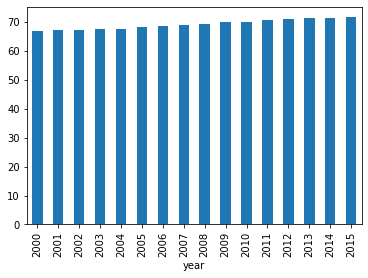

In [0]:
df3.plot.bar()

In [0]:
# Question 3
# Does life expectancy have a positive or negative correlation with alcohol consumption?
# Am not sure this is excatly how correlation should be done
#df3=df1.groupby(['life_expectancy'])['alcohol'].count().sort_values(ascending=False)
#df3

dfb = df1a['life_expectancy'].corr(df['alcohol'])
dfb

0.3704130175416205

In [0]:
# Question 4
# Which are the top 10 countries with the highest 
# a) adult mortality 
df8=df1a.groupby(['country'])['adult_mortality'].mean().sort_values(ascending=False)
df8.head(10)

country
Lesotho          550.0625
Zimbabwe         462.3750
Botswana         448.1250
Malawi           424.4375
Côte d'Ivoire    417.3125
South Africa     412.7500
Sierra Leone     357.8125
Zambia           354.3125
Kenya            348.5625
South Sudan      346.3125
Name: adult_mortality, dtype: float64

In [0]:
# Question 4
# Which are the top 10 countries with the highest
#b) Infant mortality rate?
df9=df1a.groupby(['country'])['infant_deaths'].mean().sort_values(ascending=False)
df9.head(10)

country
India                               1366.6875
Nigeria                              535.6875
Pakistan                             367.9375
China                                294.8750
Democratic Republic of the Congo     234.5000
Ethiopia                             187.7500
Bangladesh                           153.6250
Indonesia                            151.1875
United Republic of Tanzania           95.2500
Uganda                                89.6875
Name: infant_deaths, dtype: float64

In [0]:
# Question 5a
# Which are the 10 most affected countries by measles disease? (Measles - number of reported cases per 1000 population)
df5a=df1a.groupby(['country'])['measles'].mean().sort_values(ascending=False).head(10)
df5a



country
China                               65857.9375
Nigeria                             51653.9375
Democratic Republic of the Congo    48922.6875
India                               46454.1875
Indonesia                           16244.9375
Niger                               15467.1250
Uganda                              12394.6250
Madagascar                           9576.1875
Malawi                               7559.4375
Philippines                          7144.6875
Name: measles, dtype: float64

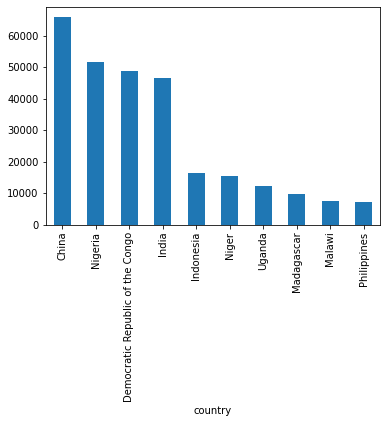

In [0]:
df5a.plot.bar()

In [0]:
# Question 5b
# Which are the 10 most affected countries by HIV/AIDS diseases?(Deaths per 1 000 live births HIV/AIDS (0-4 years))
df5b=df1a.groupby(['country'])['hiv/aids'].mean().sort_values(ascending=False).head(10)
df5b

country
Swaziland                   32.94375
Zimbabwe                    23.26250
Lesotho                     22.96875
South Africa                18.49375
Malawi                      16.68125
Botswana                    16.52500
Namibia                     13.64375
Zambia                      11.93125
Mozambique                  11.38750
Central African Republic     8.98125
Name: hiv/aids, dtype: float64

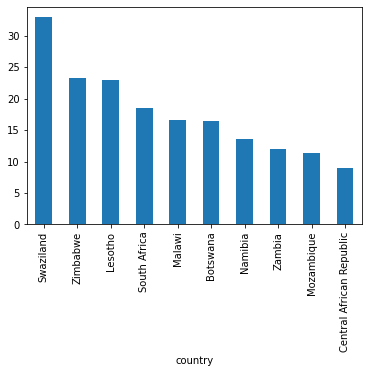

In [0]:
df5b.plot.bar()

In [0]:
# Question 6
# What is the relationship between the health of the citizens and their life expectancy?

df6 = df1a['life_expectancy'].corr(df['bmi'])
df6

0.5761607532307395

In [0]:
# Question 7
#	Which countries have the lowest life expectancy rate?
df7=df1a.groupby(['country'])['life_expectancy'].mean().sort_values(ascending=True).head(15)
df7

country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Chad                        50.38750
Côte d'Ivoire               50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Somalia                     53.31875
Mozambique                  53.39375
South Sudan                 53.87500
Zambia                      53.90625
Cameroon                    54.01875
Name: life_expectancy, dtype: float64

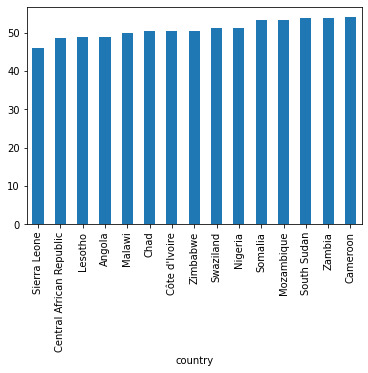

In [0]:
df7.plot.bar()

In [0]:
# What was the lowest life expectancy in the developing countries?
df1a.nsmallest(2,'life_expectancy')

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,bmi,hiv/aids
1127,Haiti,2010,Developing,36.3,682.0,23,5.76,0,44.2,1.9
2312,Sierra Leone,2000,Developing,39.0,533.0,29,3.97,3575,17.2,1.2


In [0]:
df1a.nlargest(2,'life_expectancy')

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,bmi,hiv/aids
241,Belgium,2014,Developed,89.0,76.0,0,12.6,70,63.4,0.1
915,Finland,2014,Developing,89.0,78.0,0,8.8,0,61.7,0.1
